## Project - Ford Go Bike 2017 Data Exploration
### By Somya Bharti

**This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. I will be performing analysing and visualization for answering relevant questions.**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Data Wrangling

### Gather:

In [2]:
df=pd.read_csv('2017-fordgobike-tripdata.csv')

### Assess:

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [4]:
df.shape

(519700, 13)

In [5]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
dtype: object

- There are no missing values in the dataset.
- Datatype of start_time, end_time are String but it should be DateTime.
- We need to analyze bike_id, user_type, so it should be a categorical variable.

In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


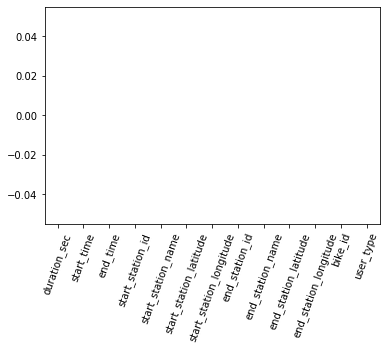

In [7]:
na_counts = df.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color = base_color)
plt.xticks(rotation=70);

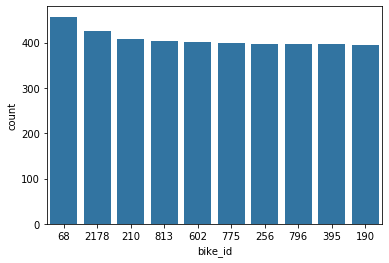

In [8]:
base_color = sb.color_palette()[0]
id = df['bike_id'].value_counts().head(10).index
sb.countplot(data = df, x = 'bike_id', color = base_color, order = id)

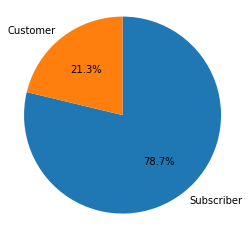

In [9]:
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,autopct='%.1f%%');
plt.axis('square');

In [10]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id',
       'user_type'],
      dtype='object')

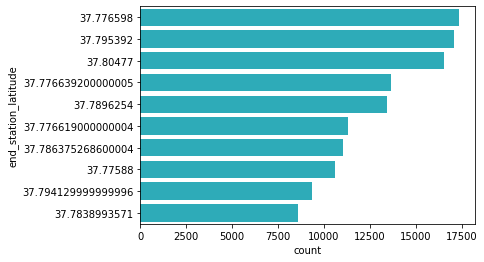

In [11]:
base_color = sb.color_palette()[9]
end_station_latitude = df['end_station_latitude'].value_counts().head(10).index
sb.countplot(data = df, y = 'end_station_latitude', color = base_color, order = end_station_latitude)

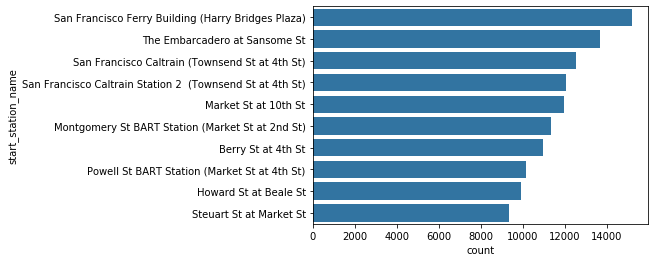

In [12]:
#df['start_station_name'].value_counts().head(10)
base_color = sb.color_palette()[0]
start_station_name = df['start_station_name'].value_counts().head(10).index
sb.countplot(data = df, y = 'start_station_name', color = base_color, order = start_station_name)

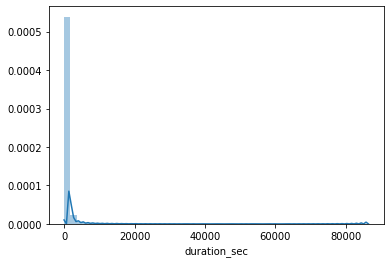

In [13]:
sb.distplot(df['duration_sec'])

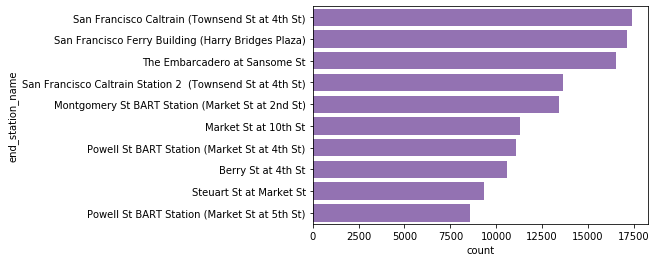

In [14]:
#df['start_station_name'].value_counts().head(10)
base_color = sb.color_palette()[4]
end_station_name = df['end_station_name'].value_counts().head(10).index
sb.countplot(data = df, y = 'end_station_name', color = base_color, order = end_station_name)

### Clean:

- Make a copy of the original dataset.

In [91]:
df_new=df.copy()

In [92]:
df_new['start_time'] = pd.to_datetime(df_new['start_time'])
df_new['end_time'] = pd.to_datetime(df_new['end_time'])

In [93]:
df_new.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
dtype: object

In [94]:
df_new['start_station_id'] = df_new['start_station_id'].astype('str')
df_new['end_station_id'] = df_new['end_station_id'].astype('str')
df_new['bike_id'] = df_new['bike_id'].astype('str')
df_new['user_type'] = df_new['user_type'].astype('category')

In [95]:
df_new.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
dtype: object

When are most trips taken in terms
of time of day, day of the week, or
month of the year?
How long does the average trip
take?
Does the above depend on if a user
is a subscriber or customer?

In [96]:
import datetime as dt
df_new['start_date'] = df_new['start_time'].dt.date
df_new['end_date'] = df_new['end_time'].dt.date

In [97]:
df_new['start_hour'] = df_new['start_time'].dt.hour
df_new['end_hour'] = df_new['end_time'].dt.hour

In [98]:
df_new['start_week'] = df_new['start_time'].dt.weekday_name.str.slice(stop=3)
df_new['end_week'] = df_new['end_time'].dt.weekday_name.str.slice(stop=3)

In [99]:
df_new['start_month'] = df_new['start_time'].dt.month_name().str.slice(stop=3)
df_new['end_month'] = df_new['end_time'].dt.month_name().str.slice(stop=3)

In [100]:
df_new['duration_min']=df_new['duration_sec']/60

In [101]:
df_new.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'start_date', 'end_date', 'start_hour', 'end_hour', 'start_week',
       'end_week', 'start_month', 'end_month', 'duration_min'],
      dtype='object')

In [102]:
df_new.drop(['start_station_name','duration_sec','start_station_latitude','start_time','end_time' ,'start_station_longitude','end_station_name', 'end_station_latitude', 'end_station_longitude'], axis = 1, inplace=True) 

In [103]:
df_new.head(10)

,start_station_id,end_station_id,bike_id,user_type,start_date,end_date,start_hour,end_hour,start_week,end_week,start_month,end_month,duration_min
0,74,43,96,Customer,2017-12-31,2018-01-01,16,15,Sun,Mon,Dec,Jan,1335.166667
1,284,96,88,Customer,2017-12-31,2018-01-01,15,13,Sun,Mon,Dec,Jan,1313.333333
2,245,245,1094,Customer,2017-12-31,2018-01-01,22,11,Sun,Mon,Dec,Jan,762.800000
3,60,5,2831,Customer,2017-12-31,2018-01-01,17,10,Sun,Mon,Dec,Jan,1036.200000
4,239,247,3167,Subscriber,2017-12-31,2018-01-01,14,2,Sun,Mon,Dec,Jan,726.716667
5,30,30,1487,Customer,2017-12-31,2018-01-01,22,1,Sun,Mon,Dec,Jan,153.766667
6,259,259,3539,Customer,2017-12-31,2018-01-01,23,1,Sun,Mon,Dec,Jan,75.116667
7,284,284,1503,Customer,2017-12-31,2018-01-01,23,0,Sun,Mon,Dec,Jan,72.233333
8,20,20,3125,Customer,2017-12-31,2018-01-01,23,0,Sun,Mon,Dec,Jan,69.166667
9,20,20,2543,Customer,2017-12-31,2018-01-01,23,0,Sun,Mon,Dec,Jan,70.633333


### structure of our dataset
When are most trips taken in terms
of time of day, day of the week, or
month of the year?

How long does the average trip
take?

Does the above depend on if a user
is a subscriber or customer?

## Univariate Exploration

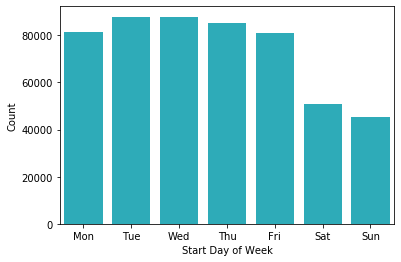

In [104]:
week_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
week_category = pd.api.types.CategoricalDtype(ordered=True, categories=week_days)
df_new['start_week'] = df_new['start_week'].astype(week_category)
base_color = sb.color_palette()[9]
sb.countplot(data=df_new, x='start_week', color=base_color);
plt.xlabel('Start Day of Week');
plt.ylabel('Count');

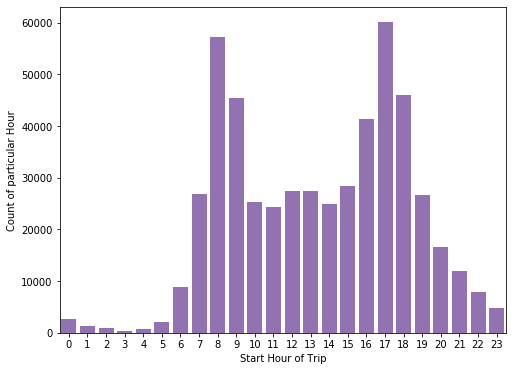

In [105]:
fig_dims = (8,6)
fig, ax = plt.subplots(figsize=fig_dims)
base_color = sb.color_palette()[4]

sb.countplot(data=df_new, x='start_hour',ax=ax, color=base_color);
plt.xlabel('Start Hour of Trip');
plt.ylabel('Count of particular Hour');

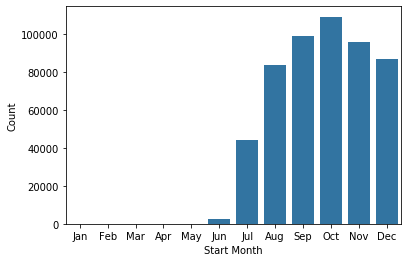

In [106]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_category = pd.api.types.CategoricalDtype(ordered=True, categories=months)
df_new['start_month'] = df_new['start_month'].astype(month_category)
base_color = sb.color_palette()[0]
sb.countplot(data=df_new, x='start_month', color=base_color);
plt.xlabel('Start Month');
plt.ylabel('Count');


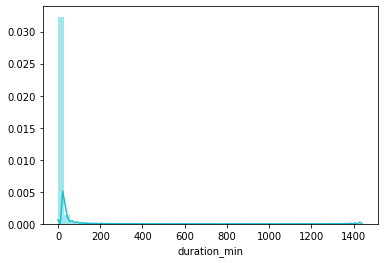

In [107]:
base_color = sb.color_palette()[9]
sb.distplot(df_new['duration_min'],color=base_color);

In [108]:
df_new['duration_min'].describe()

count    519700.000000
mean         18.316825
std          57.402441
min           1.016667
25%           6.366667
50%           9.933333
75%          15.633333
max        1439.483333
Name: duration_min, dtype: float64

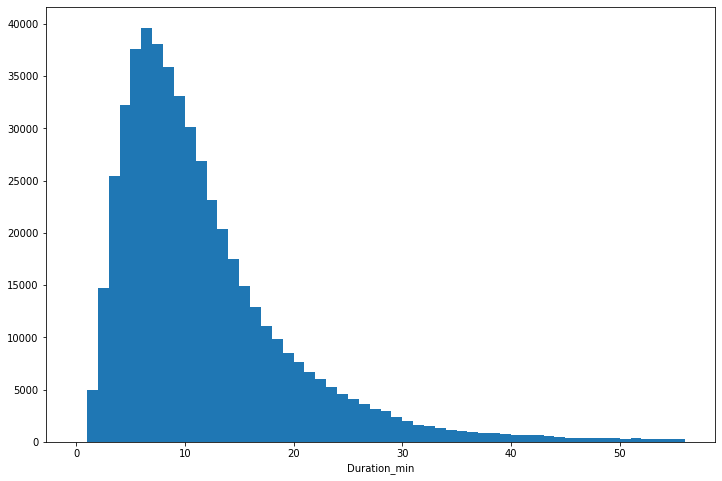

In [109]:
binsize = 1
bins = np.arange(0, 57, binsize)

plt.figure(figsize=[12, 8])
plt.hist(data = df_new, x = 'duration_min', bins = bins)
plt.xlabel('Duration_min')
plt.show()

## Bivariate Exploration

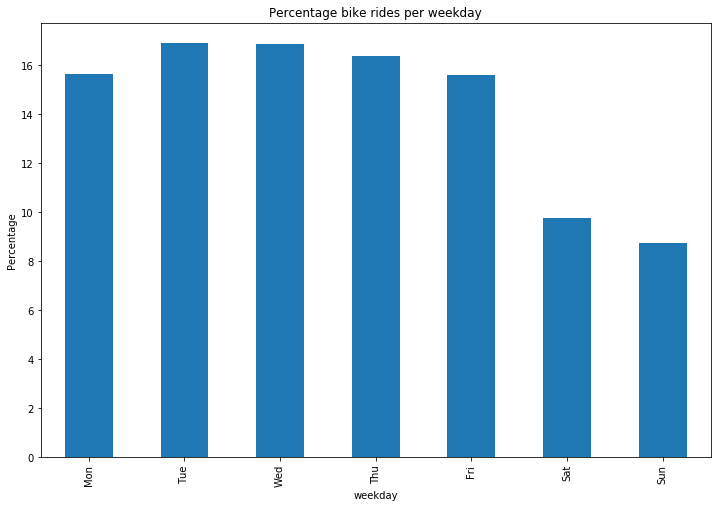

In [110]:
weekday_trips = df_new.groupby('start_week').agg({'bike_id':'count'})
weekday_trips['perc'] = (weekday_trips['bike_id']/weekday_trips['bike_id'].sum())*100
weekday_index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_trips.reindex(weekday_index)['perc'].plot(kind='bar', figsize=(12,8))
plt.title('Percentage bike rides per weekday')
plt.xlabel('weekday')
plt.ylabel('Percentage');


(0, 100)

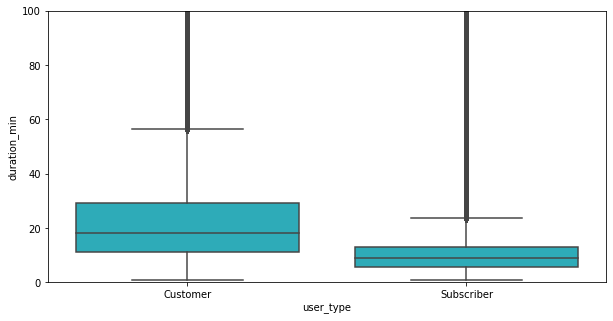

In [111]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[9]

# left plot: violin plot
#plt.subplot(1, 2, 1)
ax1 = sb.boxplot(data = df_new, x = 'user_type', y = 'duration_min', color = base_color)
plt.ylim(0,100)

# right plot: box plot


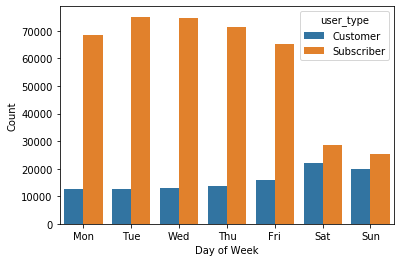

In [112]:
sb.countplot(data=df_new, x='start_week', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');

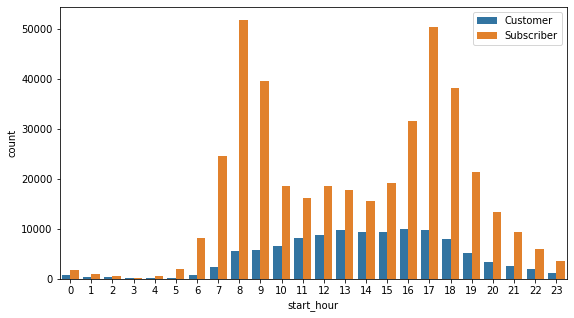

In [113]:
plt.figure(figsize = [20, 5])

# left plot: clustered bar chart, absolute counts
plt.subplot(1, 2, 1)
sb.countplot(data = df_new, x = 'start_hour', hue = 'user_type')
plt.legend();



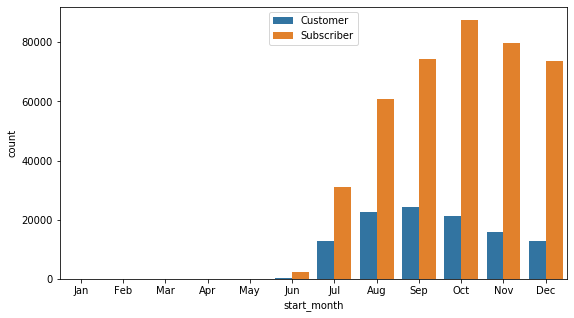

In [114]:
plt.figure(figsize = [20, 5])

# left plot: clustered bar chart, absolute counts
plt.subplot(1, 2, 1)
sb.countplot(data = df_new, x = 'start_month', hue = 'user_type')
plt.legend();



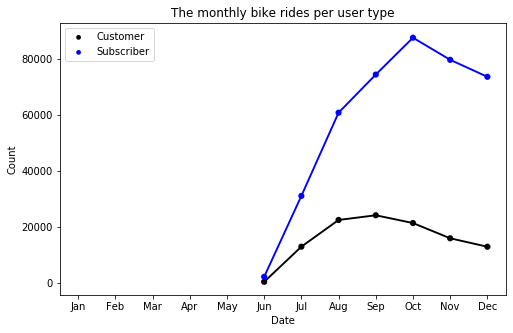

In [115]:
user_type_count = df_new.groupby(["start_month", "user_type"]).size().reset_index()
plt.figure(figsize=(8,5))
color = {'Subscriber':'blue', 'Customer':'black'}
axis = sb.pointplot(x='start_month', y=0, hue='user_type', palette=color, scale=.7, data=user_type_count)
plt.title('The monthly bike rides per user type')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend();

## Multivariate Exploration

<Figure size 432x288 with 0 Axes>

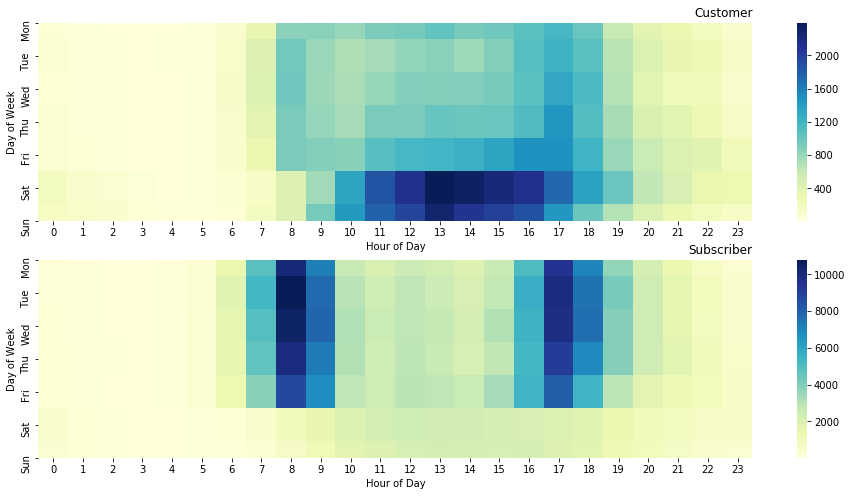

In [116]:
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')
#fig, ax = plt.subplots(figsize=(5,5)) 

plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
customers = df_new.query('user_type == "Customer"')
ct_counts = customers.groupby(['start_week', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_week', columns='start_hour', values='count')
sb.heatmap(ct_counts, cmap='YlGnBu');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = df_new.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['start_week', 'start_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='start_week', columns='start_hour', values='count')
sb.heatmap(st_counts, cmap='YlGnBu');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

